In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [127]:
# data = pd.read_csv('simulation_data.csv')
data = pd.read_csv('data/run_30413/run_30413_labelled.csv')
data.head()

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,...,k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,integral_ideal,max_deviation,time_peak,class
0,27,5.026208,0.009095,77397.44901,513.901,2.120217,0.011064,0.461558,0.023110,0.541846,...,0.084142,0.003332,0.075697,0.002791,6.949847,0.0,0.0,0.359610,0.0,ideal_class1
1,29,5.020406,0.009001,78109.25518,591.148,2.138809,0.011979,0.561821,0.025246,0.662031,...,0.051719,0.002366,0.045847,0.002085,5.100328,0.0,0.0,0.427803,0.0,ideal_class1
2,30,5.032076,0.009131,77888.92272,510.013,2.094083,0.010768,0.441545,0.023579,0.512535,...,0.062798,0.002715,0.054859,0.002260,3.084513,0.0,0.0,0.326275,0.0,ideal_class1
3,234,5.035825,0.008914,79029.88703,504.602,2.125513,0.010632,0.491507,0.027460,0.566600,...,0.107775,0.007456,0.101695,0.006645,5.240735,0.0,0.0,0.352626,0.0,ideal_class1
4,244,5.047859,0.009059,76720.65087,537.404,2.131137,0.011350,0.553060,0.030174,0.624168,...,0.055746,0.003920,0.052583,0.003658,4.399844,0.0,0.0,0.326069,0.0,ideal_class1


In [128]:
data.columns

Index(['#Ch.#', 't', 'E(t)', 'A_0', 'E(A_0)', 't_p', 'E(t_p)', 'k3', 'E(k3)',
       'k4', 'E(k4)', 'k5', 'E(k5)', 'k6', 'E(k6)', 'Chi2/DOF', 'integral_R',
       'integral_ideal', 'max_deviation', 'time_peak', 'class'],
      dtype='object')

In [129]:
# map_data = {'Overshoot': 1, 'Undershoot': 2, 'Ideal': 3, 'Singularity': 4, 'Abnormal': 5}
# data['class'] = data['class'].map(map_data)

In [130]:
data

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,...,k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,integral_ideal,max_deviation,time_peak,class
0,27,5.026208,0.009095,77397.44901,513.901,2.120217,0.011064,0.461558,0.023110,0.541846,...,0.084142,0.003332,0.075697,0.002791,6.949847,0.000000,0.000000,0.359610,0.0,ideal_class1
1,29,5.020406,0.009001,78109.25518,591.148,2.138809,0.011979,0.561821,0.025246,0.662031,...,0.051719,0.002366,0.045847,0.002085,5.100328,0.000000,0.000000,0.427803,0.0,ideal_class1
2,30,5.032076,0.009131,77888.92272,510.013,2.094083,0.010768,0.441545,0.023579,0.512535,...,0.062798,0.002715,0.054859,0.002260,3.084513,0.000000,0.000000,0.326275,0.0,ideal_class1
3,234,5.035825,0.008914,79029.88703,504.602,2.125513,0.010632,0.491507,0.027460,0.566600,...,0.107775,0.007456,0.101695,0.006645,5.240735,0.000000,0.000000,0.352626,0.0,ideal_class1
4,244,5.047859,0.009059,76720.65087,537.404,2.131137,0.011350,0.553060,0.030174,0.624168,...,0.055746,0.003920,0.052583,0.003658,4.399844,0.000000,0.000000,0.326069,0.0,ideal_class1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,10219,5.091361,0.008972,76385.12167,469.640,1.979175,0.006975,0.049197,0.003300,0.035414,...,0.026578,0.003170,0.035421,0.003157,9.264075,807.422540,1.548042,0.042802,0.0,overshoot_class0
6136,10222,5.104848,0.009951,73687.26229,463.515,2.095373,0.008364,0.058495,0.002032,0.027759,...,0.014693,0.001748,0.027787,0.001718,6.315967,3605.438343,1.913742,0.165221,0.0,overshoot_class0
6137,10224,5.081329,0.009629,83548.37431,1753.900,2.195073,0.016421,1.624984,0.135674,1.869724,...,0.053812,0.005959,0.053016,0.005882,6.174783,207.781507,1.719655,0.538978,0.0,overshoot_class2
6138,10226,5.105504,0.009342,75059.88015,451.101,2.103103,0.007255,0.029225,0.002810,0.016374,...,0.008011,0.002532,0.016458,0.002603,7.309111,1029.575895,1.951460,0.042463,0.0,overshoot_class0


In [131]:
def one_hot_encode_sklearn(data, column_name):
    """
    One-hot encode using scikit-learn's OneHotEncoder.
    
    Parameters:
    data (pandas.DataFrame): Input DataFrame
    column_name (str): Name of the column to encode
    
    Returns:
    pandas.DataFrame: DataFrame with one-hot encoded column
    """
    # Reshape data for encoder
    X = data[column_name].values.reshape(-1, 1)
    
    # Create and fit the encoder
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(X)
    
    # Create new column names
    feature_names = encoder.get_feature_names_out([column_name])

    print(encoded)
    print(feature_names)
    # Create DataFrame with encoded values
    encoded_df = pd.DataFrame(encoded, columns=feature_names, index=data.index)
    
    # Combine with original data
    result = pd.concat([data.drop(column_name, axis=1), encoded_df], axis=1)
    
    return result

In [132]:
encoded_df = one_hot_encode_sklearn(data=data, column_name='class')

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['class_ideal_class0' 'class_ideal_class1' 'class_overshoot_class0'
 'class_overshoot_class1' 'class_overshoot_class2'
 'class_overshoot_class3' 'class_overshoot_class4'
 'class_overshoot_class5' 'class_undershoot_class0'
 'class_undershoot_class1' 'class_undershoot_class2'
 'class_undershoot_class3' 'class_undershoot_class4'
 'class_undershoot_class5']


In [133]:
encoded_df

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,...,class_overshoot_class2,class_overshoot_class3,class_overshoot_class4,class_overshoot_class5,class_undershoot_class0,class_undershoot_class1,class_undershoot_class2,class_undershoot_class3,class_undershoot_class4,class_undershoot_class5
0,27,5.026208,0.009095,77397.44901,513.901,2.120217,0.011064,0.461558,0.023110,0.541846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,5.020406,0.009001,78109.25518,591.148,2.138809,0.011979,0.561821,0.025246,0.662031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30,5.032076,0.009131,77888.92272,510.013,2.094083,0.010768,0.441545,0.023579,0.512535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,234,5.035825,0.008914,79029.88703,504.602,2.125513,0.010632,0.491507,0.027460,0.566600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,244,5.047859,0.009059,76720.65087,537.404,2.131137,0.011350,0.553060,0.030174,0.624168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,10219,5.091361,0.008972,76385.12167,469.640,1.979175,0.006975,0.049197,0.003300,0.035414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6136,10222,5.104848,0.009951,73687.26229,463.515,2.095373,0.008364,0.058495,0.002032,0.027759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6137,10224,5.081329,0.009629,83548.37431,1753.900,2.195073,0.016421,1.624984,0.135674,1.869724,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6138,10226,5.105504,0.009342,75059.88015,451.101,2.103103,0.007255,0.029225,0.002810,0.016374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
import xgboost as xgb
from xgboost import XGBRegressor  # for regression
from xgboost import XGBClassifier # for classification
from sklearn.model_selection import train_test_split


# Prepare your data
# targets = ['Overshoot', 'Undershoot', 'Ideal', 'Singularity']
# targets = ['class_1', 'class_2', 'class_3', 'class_4', 'class_5']
targets = ['class_ideal_class0', 'class_ideal_class1', 'class_overshoot_class0',
 'class_overshoot_class1', 'class_overshoot_class2',
 'class_overshoot_class3', 'class_overshoot_class4',
 'class_overshoot_class5', 'class_undershoot_class0',
 'class_undershoot_class1', 'class_undershoot_class2',
 'class_undershoot_class3', 'class_undershoot_class4',
 'class_undershoot_class5']
# taget0 = ['integral_R',
#        'integral_ideal', 'max_deviation', 'time_peak']
# X = encoded_df.drop(targets, axis=1)
# X = encoded_df[['k3', 'k4', 'k5', 'k6']].copy()
# X = encoded_df[['t', 'E(t)', 'A_0', 'E(A_0)', 't_p', 'E(t_p)', 'k3', 'E(k3)',
#        'k4', 'E(k4)', 'k5', 'E(k5)', 'k6', 'E(k6)', 'Chi2/DOF']]
X = encoded_df[['integral_R',
       'integral_ideal', 'max_deviation', 'time_peak']]
y = encoded_df[targets]

# First split: separate test set (20% of total data)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2, # 20% for testing
    random_state=42
)

# Second split: divide remaining data into train and validation (80% train, 20% validation of remaining data)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.2, # 20% of the X_temp for validation ==> 16% for validation and 64% for training
    random_state=42
)

-------------
### Getting to know the training data

In [176]:
print('Total entries in the data = ', len(data))

Total entries in the data =  6140


In [177]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df.head()

,integral_R,integral_ideal,max_deviation,time_peak,class_ideal_class0,class_ideal_class1,class_overshoot_class0,class_overshoot_class1,class_overshoot_class2,class_overshoot_class3,class_overshoot_class4,class_overshoot_class5,class_undershoot_class0,class_undershoot_class1,class_undershoot_class2,class_undershoot_class3,class_undershoot_class4,class_undershoot_class5
2367,-213.805707,2.200675,0.804314,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3262,-3920.555545,2.083715,0.105065,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2084,-276.443464,2.257758,0.785220,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5684,1776.718326,1.910092,0.704673,-1.014493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
231,-665.087310,1.970667,0.911120,-1.014493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [178]:
# print('Number of overshoot : ', np.sum(train_df['class_1']))
# print('Number of undershoot : ', np.sum(train_df['class_2']))
# print('Number of Ideal : ', np.sum(train_df['class_3']))
# print('Number of Singularity : ', np.sum(train_df['class_4']))
# print('Number of Abnormal : ', np.sum(train_df['class_5']))

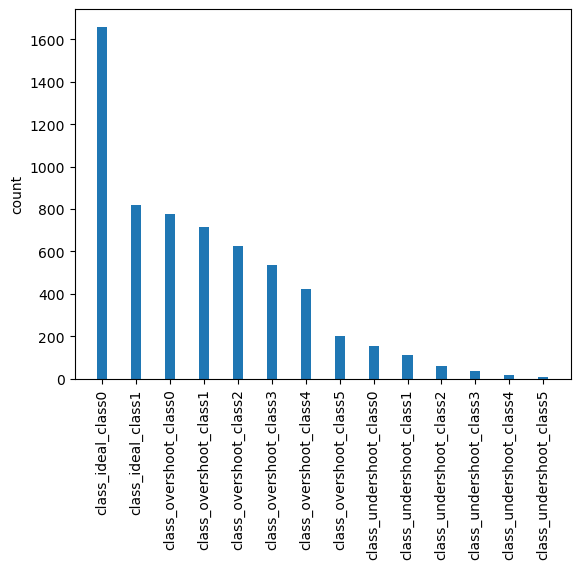

In [179]:
# plt.figure()
# plt.hist(data['class'])
# plt.xticks(['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'])
# plt.show()
# Get value counts of the classes
class_counts = data['class'].value_counts()

plt.figure()
plt.bar(range(len(class_counts)), class_counts.values, width=0.3)
plt.ylabel('count')
# plt.xticks(range(len(class_counts)), ['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'])
plt.xticks(range(len(class_counts)), targets, rotation=90)
plt.show()

-------------------

In [180]:
# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    # 'max_depth': 3,
    # 'learning_rate': 0.1,
    'learning_rate': 0.05, 'max_depth': 3,
    'objective': 'binary:logistic',  # for classification
    'eval_metric': 'logloss',
    'tree_method' : 'gpu_hist'
}

# Specify evaluation sets
evals = [(dtrain, 'train'), (dval, 'validation')]

In [181]:
# Train model
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    # num_boost_round = 200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

[0]	train-logloss:0.26321	validation-logloss:0.26332
[1]	train-logloss:0.24319	validation-logloss:0.24338
[2]	train-logloss:0.22630	validation-logloss:0.22655
[3]	train-logloss:0.21159	validation-logloss:0.21188
[4]	train-logloss:0.19846	validation-logloss:0.19883
[5]	train-logloss:0.18667	validation-logloss:0.18709
[6]	train-logloss:0.17596	validation-logloss:0.17639
[7]	train-logloss:0.16584	validation-logloss:0.16624
[8]	train-logloss:0.15656	validation-logloss:0.15694
[9]	train-logloss:0.14804	validation-logloss:0.14838
[10]	train-logloss:0.14012	validation-logloss:0.14044
[11]	train-logloss:0.13277	validation-logloss:0.13307
[12]	train-logloss:0.12576	validation-logloss:0.12606
[13]	train-logloss:0.11925	validation-logloss:0.11954
[14]	train-logloss:0.11317	validation-logloss:0.11345
[15]	train-logloss:0.10746	validation-logloss:0.10777
[16]	train-logloss:0.10211	validation-logloss:0.10244
[17]	train-logloss:0.09708	validation-logloss:0.09741
[18]	train-logloss:0.09237	validation-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:40:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[22]	train-logloss:0.07608	validation-logloss:0.07648
[23]	train-logloss:0.07256	validation-logloss:0.07297
[24]	train-logloss:0.06924	validation-logloss:0.06968
[25]	train-logloss:0.06611	validation-logloss:0.06655
[26]	train-logloss:0.06315	validation-logloss:0.06360
[27]	train-logloss:0.06038	validation-logloss:0.06084
[28]	train-logloss:0.05772	validation-logloss:0.05819
[29]	train-logloss:0.05524	validation-logloss:0.05571
[30]	train-logloss:0.05286	validation-logloss:0.05337
[31]	train-logloss:0.05063	validation-logloss:0.05115
[32]	train-logloss:0.04839	validation-logloss:0.04892
[33]	train-logloss:0.04629	validation-logloss:0.04683
[34]	train-logloss:0.04430	validation-logloss:0.04484
[35]	train-logloss:0.04240	validation-logloss:0.04297
[36]	train-logloss:0.04056	validation-logloss:0.04113
[37]	train-logloss:0.03890	validation-logloss:0.03952
[38]	train-logloss:0.03733	validation-logloss:0.03796
[39]	train-logloss:0.03581	validation-logloss:0.03649
[40]	train-logloss:0.03432	v

-----------------------------------------
### Wrapper for tuning the hyperparameters using grid search (GridSearchCV of scikit-learn)
This block of codes can be ignored when first testing to train the xgboost

In [125]:
from sklearn.model_selection import GridSearchCV

# # Create a custom callback for learning rate decay
# def learning_rate_decay(boosting_round, decay_factor=0.5):
#     def callback(env):
#         if (env.iteration + 1) == boosting_round:
#             # Get current learning rate
#             old_lr = env.model.get_params()['learning_rate']
#             # Set new learning rate
#             new_lr = old_lr * decay_factor
#             env.model.set_params(learning_rate=new_lr)
#             print(f"Learning rate decreased from {old_lr} to {new_lr}")
#     return callback

# # Set parameters
param_grid = {
    # 'max_depth': [2, 3, 4, 5, 6, 7],
    'max_depth' : [6],
    # 'learning_rate': [0.1, 0.05],
    'learning_rate' : [0.1],
    'num_boost_round' : [100, 200],
    # 'num_boost_round' : [100],
    # 'n_estimators': [50, 70, 90, 100, 110, 120, 200],
    'n_estimators' : [90],
    # 'n_estimators': [100, 120, 200],
    'objective': ['binary:logistic'],  # for classification
    'eval_metric': ['logloss'],
    'tree_method' : ['gpu_hist']
}

# xgb_wrapper = XGBTrainWrapper()
# grid_search = GridSearchCV(estimator=xgb_wrapper, 
#                            param_grid=param_grid, 
#                            scoring='accuracy', cv=3,
#                            verbose=2,
#                            )
# grid_search.fit(X_temp, y_temp)

xgb_clf = XGBClassifier(
    tree_method = 'gpu_hist',
    enable_categorical=True,
    use_label_encoder = True,
)

# callbacks = [
#     learning_rate_decay(boosting_round=50, decay_factor=np.exp(-1))
# ]

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# grid_search.fit(X_train, y_train,
#                 eval_set=[(X_val, y_val)],
#                 # early_stopping_round=10,
#                 callbacks=callbacks,
#                 verbose=False)
grid_search.fit(
    X_train, 
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:31:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:31:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:31:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[0]	validation_0-logloss:0.25195
[0]	validation_0-logloss:0.25152
[0]	validation_0-logloss:0.25195
[0]	validation_0-logloss:0.25152
[0]	validation_0-logloss:0.25106
[0]	validation_0-logloss:0.25106
[1]	validation_0-logloss:0.22592
[1]	validation_0-logloss:0.22540
[1]	validation_0-logloss:0.22592
[1]	validation_0-logloss:0.22540
[1]	validation_0-logloss:0.22479
[1]	validation_0-logloss:0.22479
[2]	validation_0-logloss:0.20514
[2]	validation_0-logloss:0.20457
[2]	validation_0-logloss:0.20403
[2]	validation_0-logloss:0.20403
[2]	validation_0-logloss:0.20514
[2]	validation_0-logloss:0.20457
[3]	validation_0-logloss:0.18765
[3]	validation_0-logloss:0.18735
[3]	validation_0-logloss:0.18665
[3]	validation_0-logloss:0.18665
[3]	validation_0-logloss:0.18765
[3]	validation_0-logloss:0.18735
[4]	validation_0-logloss:0.17248
[4]	validation_0-logloss:0.17187
[4]	validation_0-logloss:0.17187
[4]	validation_0-logloss:0.17257
[4]	validation_0-logloss:0.17257
[4]	validation_0-logloss:0.17248
[5]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:31:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:31:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:31:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[4]	validation_0-logloss:0.17069
[5]	validation_0-logloss:0.15776
[6]	validation_0-logloss:0.14646
[7]	validation_0-logloss:0.13656
[8]	validation_0-logloss:0.12776
[9]	validation_0-logloss:0.11996
[10]	validation_0-logloss:0.11309
[11]	validation_0-logloss:0.10691
[12]	validation_0-logloss:0.10155
[13]	validation_0-logloss:0.09657
[14]	validation_0-logloss:0.09196
[15]	validation_0-logloss:0.08798
[16]	validation_0-logloss:0.08439
[17]	validation_0-logloss:0.08103
[18]	validation_0-logloss:0.07796
[19]	validation_0-logloss:0.07528
[20]	validation_0-logloss:0.07275
[21]	validation_0-logloss:0.07058
[22]	validation_0-logloss:0.06840
[23]	validation_0-logloss:0.06661
[24]	validation_0-logloss:0.06496
[25]	validation_0-logloss:0.06350
[26]	validation_0-logloss:0.06220
[27]	validation_0-logloss:0.06108
[28]	validation_0-logloss:0.05998
[29]	validation_0-logloss:0.05906
[30]	validation_0-logloss:0.05808
[31]	validation_0-logloss:0.05719
[32]	validation_0-logloss:0.05639
[33]	validation_0-lo

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eval_metric': ['logloss'], 'learning_rate': [0.1],
                         'max_depth': [6], 'n_estimators': [90],
                         'num_boost_round': [100, 200],
                         'objective': ['binary:logistic'],
                         'tree_method': ['gpu_hist']},
             scoring='accuracy', verbose=2)

In [126]:
print('Best parameters found : ', grid_search.best_params_)
print('Best accuracy : ', grid_search.best_score_)

Best parameters found :  {'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 90, 'num_boost_round': 100, 'objective': 'binary:logistic', 'tree_method': 'gpu_hist'}
Best accuracy :  0.8142050435719049


--------------------------

In [182]:
model.save_model('xgboost_model_onData_run30413_preprocessedInput.json')

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:41:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [183]:
# Make predictions
preds = model.predict(dtest)
preds

array([[3.7976779e-04, 1.8826913e-04, 5.9009873e-04, ..., 6.6117878e-05,
        9.1486494e-05, 1.2534385e-04],
       [1.3226907e-04, 2.3434173e-04, 9.8646623e-01, ..., 8.1050064e-05,
        7.1487833e-05, 7.1425216e-05],
       [1.3226907e-04, 1.8826913e-04, 1.4098818e-04, ..., 6.6117878e-05,
        9.1486494e-05, 1.4231063e-04],
       ...,
       [1.3226907e-04, 1.8143539e-04, 6.0158415e-04, ..., 1.0839093e-04,
        9.9811563e-04, 1.6270739e-04],
       [4.9549397e-03, 9.7484416e-01, 6.4993204e-05, ..., 1.7752527e-04,
        3.0764692e-02, 1.4430294e-03],
       [1.3226907e-04, 1.8826913e-04, 2.0439463e-04, ..., 6.6117878e-05,
        9.1486494e-05, 1.2534385e-04]], dtype=float32)

In [184]:
# Convert predictions to DataFrame with named columns
# columns = ['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal']
columns = targets
pred_df = pd.DataFrame(preds, index=X_test.index, columns=columns)
pred_df

,class_ideal_class0,class_ideal_class1,class_overshoot_class0,class_overshoot_class1,class_overshoot_class2,class_overshoot_class3,class_overshoot_class4,class_overshoot_class5,class_undershoot_class0,class_undershoot_class1,class_undershoot_class2,class_undershoot_class3,class_undershoot_class4,class_undershoot_class5
2053,0.000380,0.000188,0.000590,0.000234,0.000040,0.000072,0.000087,0.000096,0.999655,0.000225,0.000501,0.000066,0.000091,0.000125
5529,0.000132,0.000234,0.986466,0.001259,0.001223,0.000105,0.000181,0.000184,0.000414,0.000212,0.000050,0.000081,0.000071,0.000071
410,0.000132,0.000188,0.000141,0.000216,0.000040,0.000081,0.000070,0.000103,0.999614,0.000225,0.000302,0.000066,0.000091,0.000142
3770,0.000132,0.000155,0.000231,0.000253,0.002193,0.995187,0.000117,0.000964,0.000077,0.000246,0.000035,0.000839,0.000092,0.000173
5916,0.000380,0.000234,0.996779,0.001842,0.001527,0.000105,0.000182,0.000219,0.000253,0.000212,0.000050,0.000081,0.000071,0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,0.000132,0.000188,0.000206,0.000222,0.000051,0.000072,0.000087,0.000080,0.999776,0.000225,0.000923,0.000066,0.000091,0.000125
911,0.000132,0.000188,0.000206,0.000222,0.000051,0.000072,0.000087,0.000080,0.999776,0.000225,0.000923,0.000066,0.000091,0.000125
4503,0.000132,0.000181,0.000602,0.000154,0.002809,0.000226,0.997159,0.001453,0.000175,0.000120,0.000139,0.000108,0.000998,0.000163
47,0.004955,0.974844,0.000065,0.000608,0.000033,0.000105,0.004081,0.000388,0.000159,0.000408,0.000052,0.000178,0.030765,0.001443


In [185]:
pred_df['predicted_class'] = pred_df.idxmax(axis=1)
pred_df

,class_ideal_class0,class_ideal_class1,class_overshoot_class0,class_overshoot_class1,class_overshoot_class2,class_overshoot_class3,class_overshoot_class4,class_overshoot_class5,class_undershoot_class0,class_undershoot_class1,class_undershoot_class2,class_undershoot_class3,class_undershoot_class4,class_undershoot_class5,predicted_class
2053,0.000380,0.000188,0.000590,0.000234,0.000040,0.000072,0.000087,0.000096,0.999655,0.000225,0.000501,0.000066,0.000091,0.000125,class_undershoot_class0
5529,0.000132,0.000234,0.986466,0.001259,0.001223,0.000105,0.000181,0.000184,0.000414,0.000212,0.000050,0.000081,0.000071,0.000071,class_overshoot_class0
410,0.000132,0.000188,0.000141,0.000216,0.000040,0.000081,0.000070,0.000103,0.999614,0.000225,0.000302,0.000066,0.000091,0.000142,class_undershoot_class0
3770,0.000132,0.000155,0.000231,0.000253,0.002193,0.995187,0.000117,0.000964,0.000077,0.000246,0.000035,0.000839,0.000092,0.000173,class_overshoot_class3
5916,0.000380,0.000234,0.996779,0.001842,0.001527,0.000105,0.000182,0.000219,0.000253,0.000212,0.000050,0.000081,0.000071,0.000071,class_overshoot_class0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,0.000132,0.000188,0.000206,0.000222,0.000051,0.000072,0.000087,0.000080,0.999776,0.000225,0.000923,0.000066,0.000091,0.000125,class_undershoot_class0
911,0.000132,0.000188,0.000206,0.000222,0.000051,0.000072,0.000087,0.000080,0.999776,0.000225,0.000923,0.000066,0.000091,0.000125,class_undershoot_class0
4503,0.000132,0.000181,0.000602,0.000154,0.002809,0.000226,0.997159,0.001453,0.000175,0.000120,0.000139,0.000108,0.000998,0.000163,class_overshoot_class4
47,0.004955,0.974844,0.000065,0.000608,0.000033,0.000105,0.004081,0.000388,0.000159,0.000408,0.000052,0.000178,0.030765,0.001443,class_ideal_class1


In [186]:
test_df = pd.concat([X_test, pd.DataFrame(y_test.idxmax(axis=1), columns=['trueClass']), pred_df['predicted_class']], axis=1)

In [187]:
# pd.concat([X_new, pd.DataFrame(y_new.idxmax(axis=1), columns=['trueClass'])], axis=1)
test_df

,integral_R,integral_ideal,max_deviation,time_peak,trueClass,predicted_class
2053,-843.968186,1.716596,0.053788,0.000000,class_undershoot_class0,class_undershoot_class0
5529,624.529726,1.796155,0.165684,0.000000,class_overshoot_class0,class_overshoot_class0
410,-1442.998096,1.678050,0.094856,0.000000,class_undershoot_class0,class_undershoot_class0
3770,807.293559,1.657370,0.596518,-1.014493,class_overshoot_class3,class_overshoot_class3
5916,1451.583052,1.756392,0.059664,0.000000,class_overshoot_class0,class_overshoot_class0
...,...,...,...,...,...,...
2302,-1981.134600,1.868626,0.088120,0.000000,class_undershoot_class0,class_undershoot_class0
911,-1462.637566,1.883772,0.070330,0.000000,class_undershoot_class0,class_undershoot_class0
4503,412.321527,2.277906,0.755909,0.000000,class_overshoot_class4,class_overshoot_class4
47,0.000000,0.000000,0.765453,0.000000,class_ideal_class1,class_ideal_class1


In [188]:
# test_df['trueClass'] = test_df['trueClass'].map({'class_1': 'Overshoot', 'class_2': 'Undershoot', 'class_3': 'Ideal', 'class_4': 'Singularity', 'class_5': 'Abnormal'})

In [189]:
test_df

,integral_R,integral_ideal,max_deviation,time_peak,trueClass,predicted_class
2053,-843.968186,1.716596,0.053788,0.000000,class_undershoot_class0,class_undershoot_class0
5529,624.529726,1.796155,0.165684,0.000000,class_overshoot_class0,class_overshoot_class0
410,-1442.998096,1.678050,0.094856,0.000000,class_undershoot_class0,class_undershoot_class0
3770,807.293559,1.657370,0.596518,-1.014493,class_overshoot_class3,class_overshoot_class3
5916,1451.583052,1.756392,0.059664,0.000000,class_overshoot_class0,class_overshoot_class0
...,...,...,...,...,...,...
2302,-1981.134600,1.868626,0.088120,0.000000,class_undershoot_class0,class_undershoot_class0
911,-1462.637566,1.883772,0.070330,0.000000,class_undershoot_class0,class_undershoot_class0
4503,412.321527,2.277906,0.755909,0.000000,class_overshoot_class4,class_overshoot_class4
47,0.000000,0.000000,0.765453,0.000000,class_ideal_class1,class_ideal_class1


In [190]:
test_df['trueClass'] = test_df['trueClass'].apply(lambda x: '_'.join(x.split('_')[1:]))
test_df['predicted_class'] = test_df['predicted_class'].apply(lambda x: '_'.join(x.split('_')[1:]))

In [191]:
test_df

,integral_R,integral_ideal,max_deviation,time_peak,trueClass,predicted_class
2053,-843.968186,1.716596,0.053788,0.000000,undershoot_class0,undershoot_class0
5529,624.529726,1.796155,0.165684,0.000000,overshoot_class0,overshoot_class0
410,-1442.998096,1.678050,0.094856,0.000000,undershoot_class0,undershoot_class0
3770,807.293559,1.657370,0.596518,-1.014493,overshoot_class3,overshoot_class3
5916,1451.583052,1.756392,0.059664,0.000000,overshoot_class0,overshoot_class0
...,...,...,...,...,...,...
2302,-1981.134600,1.868626,0.088120,0.000000,undershoot_class0,undershoot_class0
911,-1462.637566,1.883772,0.070330,0.000000,undershoot_class0,undershoot_class0
4503,412.321527,2.277906,0.755909,0.000000,overshoot_class4,overshoot_class4
47,0.000000,0.000000,0.765453,0.000000,ideal_class1,ideal_class1


In [192]:
Accuracy = (np.sum(test_df['trueClass']==test_df['predicted_class'])/len(test_df['trueClass']))*100
print(f'Accuracy of the prediction = {np.round(Accuracy,2)}%')

Accuracy of the prediction = 99.1%


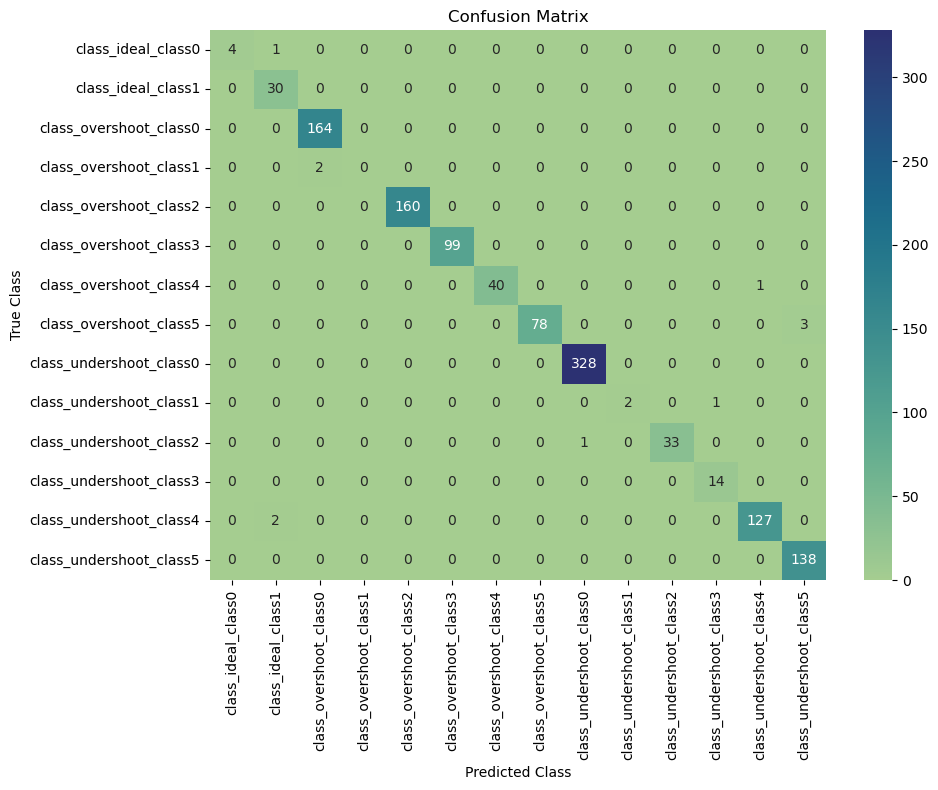

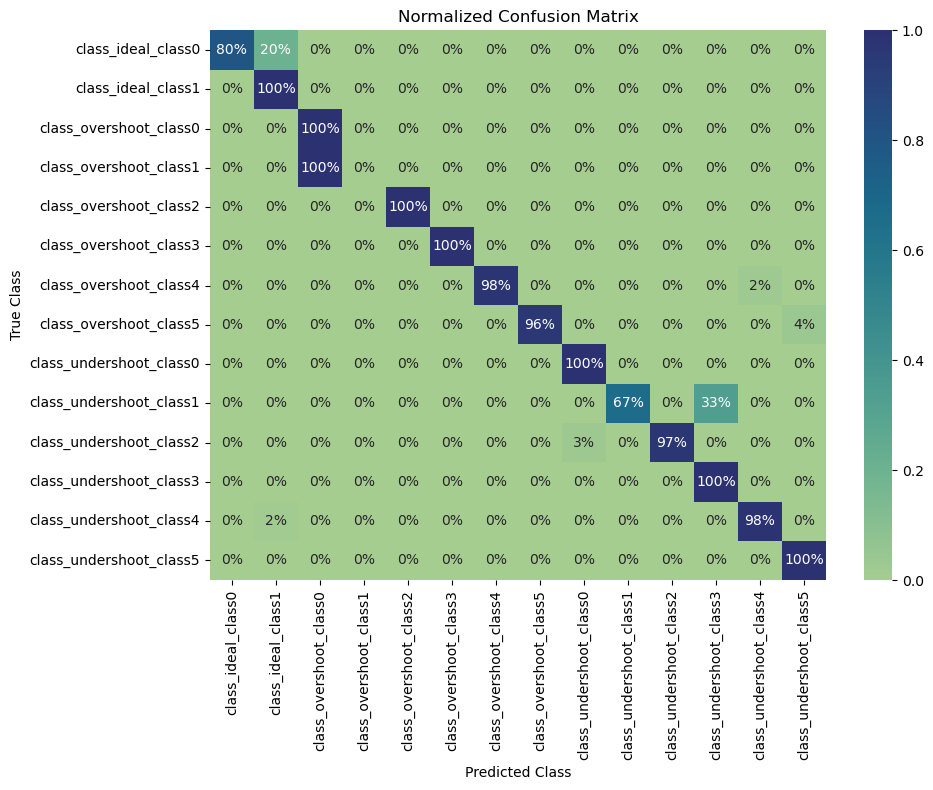

In [193]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_true=test_df['trueClass'], y_pred=test_df['predicted_class'])

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='crest',
            # xticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'],  # If your classes are 0-4
            # yticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'])  # If your classes are 0-4
            xticklabels=targets,
            yticklabels=targets)

# Add labels
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

# Show plot
plt.tight_layout()
plt.show()

# If you want to normalize the confusion matrix (show percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.0%', cmap='crest',
            # xticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'],
            # yticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'])
            xticklabels=targets,
            yticklabels=targets)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Normalized Confusion Matrix')
plt.tight_layout()
plt.show()
# {'class_1': 'Overshoot', 'class_2': 'Undershoot', 'class_3': 'Ideal', 'class_4': 'Singularity', 'class_5': 'Abnormal'}

In [ ]:
(100+100+92.43+86.66+94.90)/5